# House Sales
Dataset 2 (house_sales.csv) has data related to house sales for a county in Washington state.

In [172]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing and Pre-processing

In [173]:
df = pd.read_csv('/Users/christinevu/Downloads/house_sales.csv')
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000  604000.0       4.0       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0    5650.0     1.0           0     0  ...      7   
1           2570.0    7242.0     2.0           0     0  ...      7   
2            770.0   10000.0     1.0           0     0  ...      6   
3           1960.0    5000.0     1.0           0     0  ...      7   
4           1680.0    8080.0     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608       1530.0    1131.0     3.0           0     0  ...      8   
21609       2310.0    5813.0     2.0           0     0  ...      8   
21610       1020.0    1350.0     2.0           0     0  ...      7   
21611       1600.0    2388.0     2.0           0     0  ...      8   
21612       1020.0    1076.0     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [165]:
#Drop "ID" and "Date" columns
df.drop(["id", "date"], axis=1, inplace = True)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0       3.0       1.00       1180.0    5650.0     1.0           0   
1  538000.0       3.0       2.25       2570.0    7242.0     2.0           0   
2  180000.0       2.0       1.00        770.0   10000.0     1.0           0   
3  604000.0       4.0       3.00       1960.0    5000.0     1.0           0   
4  510000.0       3.0       2.00       1680.0    8080.0     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [175]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  20479.000000  20545.000000  20503.000000   
mean   4.580302e+09  5.400881e+05      3.372821      2.113507   2081.073697   
std    2.876566e+09  3.671272e+05      0.930711      0.768913    915.043176   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.500000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  12050.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.056900e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.517982e+04      1.494309      0.007542      0.234303      3.409430   
std    4.148617e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.070800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [174]:
# Count of missing values per column
df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [166]:
# Verify columns do not contain "0" value
print("Price 0 values: ", '0' in df.price.values)
print("Bathroom 0 values: ", '0' in df.bathrooms.values)
print("Bedroom 0 values: ", '0' in df.bedrooms.values)
print("Sqft_living 0 values: ", '0' in df.sqft_living.values)
print("Sqft_lot 0 values: ", '0' in df.sqft_lot.values)
print("Floors 0 values: ", '0' in df.floors.values)

Price 0 values:  False
Bathroom 0 values:  False
Bedroom 0 values:  False
Sqft_living 0 values:  False
Sqft_lot 0 values:  False
Floors 0 values:  False


/var/folders/wv/42dn23fd1cb0czpvqdnb6zw00000gn/T/ipykernel_6070/2741080886.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print("Price 0 values: ", '0' in df.price.values)
/var/folders/wv/42dn23fd1cb0czpvqdnb6zw00000gn/T/ipykernel_6070/2741080886.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print("Bathroom 0 values: ", '0' in df.bathrooms.values)
/var/folders/wv/42dn23fd1cb0czpvqdnb6zw00000gn/T/ipykernel_6070/2741080886.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print("Bedroom 0 values: ", '0' in df.bedrooms.values)
/var/folders/wv/42dn23fd1cb0czpvqdnb6zw00000gn/T/ipykernel_6070/2741080886.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  pr

In [167]:
# Replace missing bedroom and bathroom count by the mean
df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)
df['bathrooms'].replace(np.nan, df['bathrooms'].mean(), inplace=True)

In [168]:
# Display column unique count to check for outliers
print("Bedroom unique count:", df.bedrooms.unique())
print("Bathrooms unique count:", df.bathrooms.unique())
print("Floors unique count:", df.floors.unique())
print("Waterfront unique count:", df.waterfront.unique())
print("View unique count:", df.view.unique())
print("Condition unique count:", df.condition.unique())
print("Grade unique count:", df.grade.unique())

Bedroom unique count: [ 3.          2.          4.          5.          3.37282094  1.
  6.          7.          0.          8.          9.         10.
 33.        ]
Bathrooms unique count: [1.         2.25       3.         2.         4.5        1.5
 2.5        1.75       2.75       2.11350694 3.25       4.
 3.5        0.75       4.75       5.         4.25       3.75
 0.         5.25       6.         1.25       0.5        5.5
 5.75       8.         6.75       7.5        7.75       6.25
 6.5       ]
Floors unique count: [1.  2.  1.5 3.  2.5 3.5]
Waterfront unique count: [0 1]
View unique count: [0 3 4 2 1]
Condition unique count: [3 5 4 1 2]
Grade unique count: [ 7  6  8 11  9  5 10 12  4  3 13  1]


In [169]:
# Mode of "view" column
print("View mode: ", df["view"].mode())

# Replace all "view" column values greater than 1 with the mode, "0"
df['view'].values[df['view'] > 1] = 0

# Confirm "view" unique count to confirm command above worked and check for remaining outliers
print("View unique count:", df.view.unique())

View mode:  0    0
Name: view, dtype: int64
View unique count: [0 1]


In [170]:
# Determine the index corresponding to the max value of "bedrooms"
x = df['bedrooms'].idxmax()

# Display "sqft_lot" at max value of bedrooms
print("Sqft_lot at max value of bedrooms: ", df.loc[x, 'sqft_living'])

# 33 bedroom count highly unlikely given the corresponding "sqft_living" value; likely data entry error
# Replace "33" bedroom column count by "3"
# df["bedrooms"].replace({"33": "3"}, inplace=True)
df['bedrooms'] = df['bedrooms'].replace(['33'], '3')

# Confirm "bedroom" unique count to confirm command above worked and check for remaining outliers
print("Bedroom unique count:", df.bedrooms.unique())

Sqft_lot at max value of bedrooms:  1620.0
Bedroom unique count: [ 3.          2.          4.          5.          3.37282094  1.
  6.          7.          0.          8.          9.         10.
 33.        ]


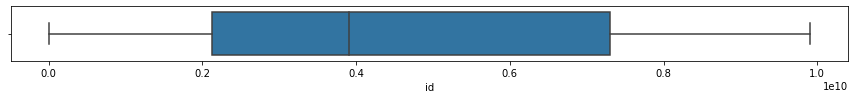

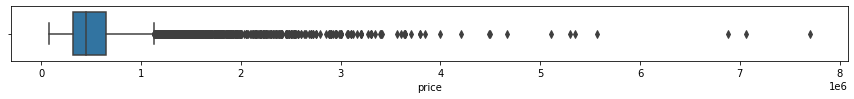

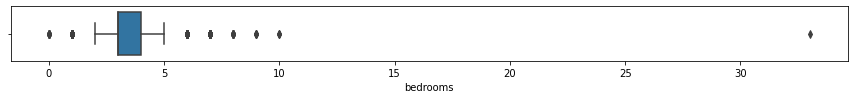

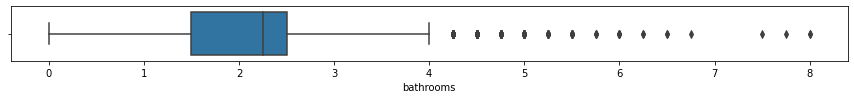

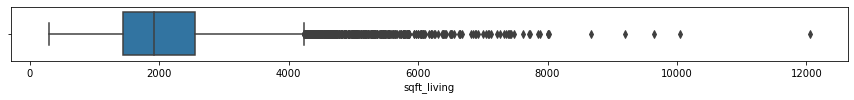

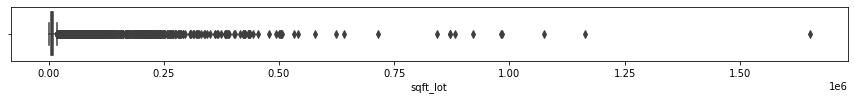

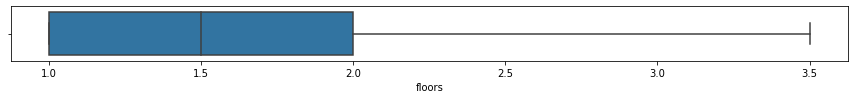

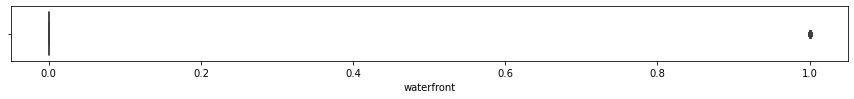

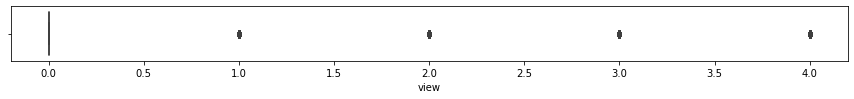

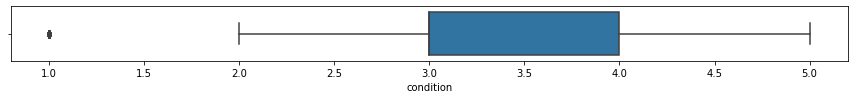

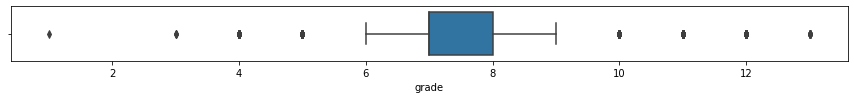

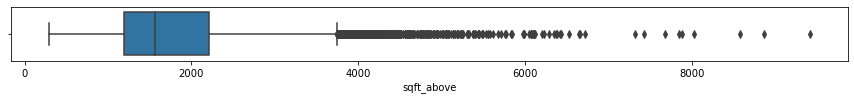

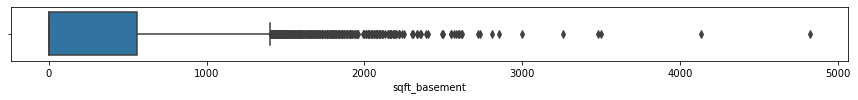

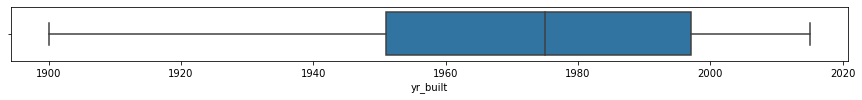

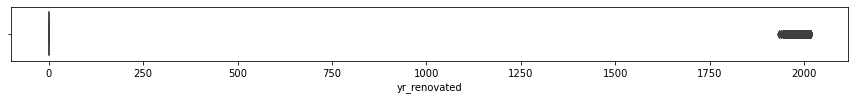

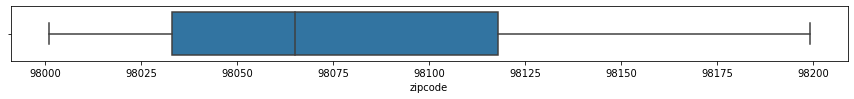

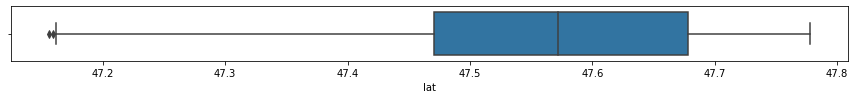

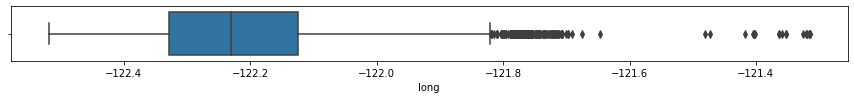

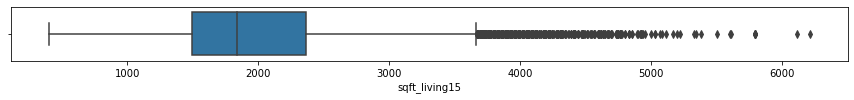

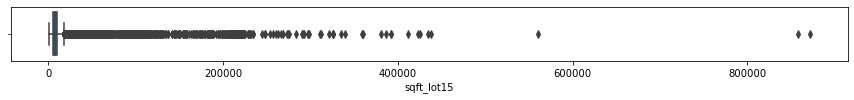

In [195]:
# Check for outliers
no_object_df = df.select_dtypes(exclude=['object'])

for column in no_object_df:
    plt.figure(figsize=(15, 1))
    sns.boxplot(data=no_object_df, x=column)